# Problem Statement:
A grocery sales company is looking for patterns in its sales data regarding regions, sales reps, and product categories.
Conduct an analysis to surface any notable patterns, particularly related to sales results.

# Basic Deliverables:
- Import at least two DataFrames
- Do at least 1 merge
- Cleaning datasets with explanations
- At least 2 visualisations accompanied by descriptions of the business insights they communicate.

Process:
1. Clean the data with rationale-backed handling of null or missing values.
2. Join the data sets together into a single DataFrame.
3. Analyze sales results and supply chain logistics in relation to other data points of your choosing.

Based on your analysis: Propose an hypothesis around patterns and correlations revealed during the analysis

In [52]:
#import dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# *Initial Framing Questions:*

*What are the business objectives in performing this data analysis?*
- Look for insights to inform new strategies to increase profitability and/or other opportunities for the business
- Determine the levels and categories most and least profitable
- Determine the high/low sales rep performers
- Determine best/worst profitable customers
- Determine highest performing product categories by Margin
- Look for opportunities with volume/margin relationships

# *Extract:*

In [2]:
#Show me the dataset files saved in the local folder
!ls

LF_Grocery.ipynb customers.csv    sales.csv
cities.csv       item_master.csv  sales_rep.csv


In [3]:
#load the relevant dataset files into memory
#probably need all of the datasets as the frame is broad and opportunistic
#cities & customers csv files required an extra encoding parameter to load
cities = pd.read_csv('./cities.csv',encoding="ISO-8859-1")
customers = pd.read_csv('./customers.csv',encoding="ISO-8859-1")
item_master = pd.read_csv('./item_master.csv')
sales = pd.read_csv('./sales.csv')
sales_rep = pd.read_csv('./sales_rep.csv')

# *Wrangle / Prepare:*

### Dealing with nulls:

**cities nulls:**

In [4]:
#checking cities nulls
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       100 non-null    object 
 1   City Code  100 non-null    int64  
 2   Region     100 non-null    object 
 3   Latitude   100 non-null    float64
 4   Longitude  100 non-null    float64
 5   Desc       99 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [5]:
#there is only 1 null row in the cities.Desc column, lets see it compared to a sample
display(cities[cities.Desc.isnull() == True])
display(cities.sample(5))
#it is just missing a city,state,country string which should be able to be derived from similar entries or the lat/long data

,City,City Code,Region,Latitude,Longitude,Desc
94,Yokohama,95,Japan,35.455592,139.572196,NaN


,City,City Code,Region,Latitude,Longitude,Desc
74,Madrid,75,Spain,40.416705,-3.703582,"""Madrid, ?rea metropolitana de Madrid y Corred..."
66,Bergen,67,Nordic,60.394346,5.325885,"""Bergen, Bergen, Hordaland, NO"""
1,Los Angeles,2,USA,34.053678,-118.242702,"""Los Angeles, Los Angeles County, CA, US"""
9,San Jose,10,USA,37.343850,-121.883135,"""San Jos, Santa Clara County, CA, US"""
86,Cologne,87,Germany,50.957703,6.954953,"""Cologne, North Rhine-Westphalia, DE"""


In [6]:
#index 93 and 94 are probably going to have the same 'Desc' data
#verified with reverse geocoding with the lat/long that both are located in Kanto
cities.iloc[93:95]

,City,City Code,Region,Latitude,Longitude,Desc
93,Tokyo,94,Japan,35.690041,139.510395,"""Kanto, JP"""
94,Yokohama,95,Japan,35.455592,139.572196,NaN


In [7]:
#overwrite the null in 'Desc' at index 94 with valid data of matching format
cities.at[94,'Desc'] = '"Kanto, JP"'

In [8]:
#checking
cities.iloc[93:95]
#looks good

,City,City Code,Region,Latitude,Longitude,Desc
93,Tokyo,94,Japan,35.690041,139.510395,"""Kanto, JP"""
94,Yokohama,95,Japan,35.455592,139.572196,"""Kanto, JP"""


**customers nulls:**

In [9]:
#checking customers nulls
customers.info()
#there are no nulls in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         684 non-null    object
 1   Customer Number  684 non-null    int64 
 2   City Code        684 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


**item_master nulls:**

In [10]:
#checking item_master nulls
item_master.info()
#there are no nulls in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        827 non-null    int64 
 1   Product Group      827 non-null    object
 2   Product Line       827 non-null    object
 3   Product Sub Group  827 non-null    object
 4   Product Type       827 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.4+ KB


**sales nulls:**

In [11]:
#checking sales nulls
sales.info()
#there are no nulls in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %KEY                    96466 non-null  int64  
 1   Cost                    96466 non-null  float64
 2   Customer Number         96466 non-null  int64  
 3   Date                    96466 non-null  object 
 4   GrossSales              96466 non-null  float64
 5   Invoice Date            96466 non-null  object 
 6   Invoice Number          96466 non-null  int64  
 7   Item Desc               96466 non-null  object 
 8   Item Number             96466 non-null  int64  
 9   Margin                  96466 non-null  float64
 10  Order Number            96466 non-null  int64  
 11  Promised Delivery Date  96466 non-null  object 
 12  Sales                   96466 non-null  float64
 13  Sales Qty               96466 non-null  float64
 14  Sales Rep Number        96466 non-null

**sales_rep nulls:**

In [12]:
#checking sales_rep nulls
sales_rep.info()
#there are some nulls in Sales Rep Name 2/3
#there are varying numbers/combinations of sales reps working on each line which would cause intentional nulls
#this means that Sales Rep Name 2/3 can remain as null
#if it is causing a problem at a later stage we can drop the columns Sales Rep Name 2/3 and still be able to refer back to that data through the Sales Rep ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manager          64 non-null     object
 1   Manager Number   64 non-null     int64 
 2   Path             64 non-null     object
 3   Sales Rep Name   64 non-null     object
 4   Sales Rep Name1  64 non-null     object
 5   Sales Rep Name2  59 non-null     object
 6   Sales Rep Name3  39 non-null     object
 7   Sales Rep ID     64 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


### Looking for shared columns across the dfs:

In [13]:
#direct intersection between cities and customers
print('cities and customers intersects at')
display(cities.columns.intersection(customers.columns))

print(f"cities shape: {cities.shape}")
print(f"customers shape: {customers.shape}")

#customers is the larger df and we want to keep all of its values of so we will merge cities into it later

cities and customers intersects at


Index(['City Code'], dtype='object')

cities shape: (100, 6)
customers shape: (684, 3)


In [14]:
#direct intersection between customers and sales
print('customers and sales intersects at')
display(customers.columns.intersection(sales.columns))

print(f"customers shape: {customers.shape}")
print(f"sales shape: {sales.shape}")

#sales is the larger df and we want to keep all of its values of so we will merge customers into it later

customers and sales intersects at


Index(['Customer Number'], dtype='object')

customers shape: (684, 3)
sales shape: (96466, 15)


In [15]:
#direct intersection between item_master and sales
print('item_master and sales intersects at')
display(item_master.columns.intersection(sales.columns))

print(f"item_master shape: {item_master.shape}")
print(f"sales shape: {sales.shape}")

#sales is the larger df and we want to keep all of its values of so we will merge item_master into it later

item_master and sales intersects at


Index(['Item Number'], dtype='object')

item_master shape: (827, 5)
sales shape: (96466, 15)


In [16]:
#indirect intersection between sales and sales_rep detected via visual inspection of columns
display(sales.columns)
display(sales_rep.columns)
#column 'Sales Rep Number' in sales df can probably merge with column 'Sales Rep ID' in sales_rep

Index(['%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Date',
       'Invoice Number', 'Item Desc', 'Item Number', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number'],
      dtype='object')

Index(['Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [17]:
#checking that both series have the same unique values
sales['Sales Rep Number'].sort_values().unique() == sales_rep['Sales Rep ID'].sort_values().unique()
#determined that the columns 'Sales Rep Number' and 'Sales Rep ID' have the same unique values and can therefore merge
#can merge sales_rep df into the larger df which is sales

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [18]:
#make the headings uniform
sales.rename(columns = {'Sales Rep Number':'Sales Rep ID'}, inplace = True)

In [19]:
#all of the datasets can merge into one to rule them all
#this will help to make sure we have enough opportunity to answer the broad framing questions

**Shared Columns Investigation Outcome:**

All dfs can be merged together as follows:
- Left merge customers and cities on 'City Code'
- Left merge sales and customers on 'Customer Number'
- Left merge sales and item_master on 'Item Number'
- Left merge sales and sales_rep on 'Sales Rep ID'

### Dealing with duplicates:

**cities duplicates:**

In [20]:
#check cities for duplicates
cities.apply(lambda x : x.duplicated().value_counts())
#cities has duplicates in Region(94) and Desc(1)
#this indicates that many of the customers are concentrated in the same Region
#these duplicates are ok to leave since we're not merging on those columns

,City,City Code,Region,Latitude,Longitude,Desc
False,100.0,100.0,6,100.0,100.0,98
True,NaN,NaN,94,NaN,NaN,2


**customers duplicates:**

In [21]:
#check customers for duplicates
customers.apply(lambda x : x.duplicated().value_counts())
#customers has duplicates in Customer Number(1), and City Code(585)
#the Customer Number duplicate is concerning but City Code duplicates just suggest a concentrated customer locality

,Customer,Customer Number,City Code
False,684.0,683,99
True,NaN,1,585


In [22]:
#finding the duplicate value in customers
customers[customers['Customer Number'].duplicated()]

,Customer,Customer Number,City Code
468,Ping,10021911,65


In [23]:
#inspecting the duplicate value in customers
customers[customers['Customer Number'] == 10021911]
#it looks like the same customer has 2 nearby but seperate locations leading to a shared customer number
#this customer number duplication will cause a problem later when merging with the sales df so one must be dropped
#it is a small sacrifice to pay and won't be of any real significance as the locations are nearby anyway

,Customer,Customer Number,City Code
467,PING,10021911,64
468,Ping,10021911,65


In [24]:
#drop duplicate as it's not significant to the analysis
#dropping will prevent creating sales duplicates when merging on this column into sales data
customers.drop_duplicates(subset='Customer Number', inplace=True)

In [25]:
#check that the duplicate is no more
customers[customers['Customer Number'].duplicated()]

,Customer,Customer Number,City Code


**item_master duplicates:**

In [26]:
#check item_master for duplicates
item_master.apply(lambda x : x.duplicated().value_counts())
#There are a lot of duplicate values in this df
#but they are ok
#The Item Number has no duplicates which is the important thing, as we will merge on that later.

,Item Number,Product Group,Product Line,Product Sub Group,Product Type
False,827.0,15,2,70,31
True,NaN,812,825,757,796


**sales duplicates:**

In [27]:
#check sales for duplicates
sales.apply(lambda x : x.duplicated().value_counts())
#there is a lot of duplicates in this dataset which was expected and necessary for the function of this analysis
#it is tolerable because its the largest dataset and we want to draw the values from the other datasets into the shape of this one

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep ID
False,96466.0,8693,636,626,17324,626,38314,825,827,25535,29072,675,26157,303,64
True,NaN,87773,95830,95840,79142,95840,58152,95641,95639,70931,67394,95791,70309,96163,96402


**sales_rep duplicates:**

In [28]:
#check sales for duplicates
sales_rep.apply(lambda x : x.duplicated().value_counts())
#There are a lot of duplicate values in this df
#but they are ok
#The Sales Rep ID has no duplicates which is the important thing, as we will merge on that later.

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
False,18,18,64.0,63,5,21,39,64.0
True,46,46,NaN,1,59,43,25,NaN


### Erroneous Values Investigation:

cities erroneous:

In [29]:
cities.describe()
#looks ok, latitudes and longitudes are within limits

,City Code,Latitude,Longitude
count,100.000000,100.000000,100.000000
mean,50.500000,44.813257,-28.028824
std,29.011492,9.437991,67.404008
min,1.000000,25.774266,-122.674195
25%,25.750000,36.589686,-87.698940
50%,50.500000,42.354573,-3.188403
75%,75.250000,53.386865,7.764462
max,100.000000,64.145981,141.354460


customers erroneous:

In [30]:
customers.describe()
#looks ok, city code values are 1 to 100 which is uniform with the cities df

,Customer Number,City Code
count,6.830000e+02,683.000000
mean,1.001661e+07,49.811127
std,7.901658e+03,30.407222
min,1.000000e+07,1.000000
25%,1.001091e+07,23.000000
50%,1.001915e+07,48.000000
75%,1.002351e+07,74.000000
max,1.002763e+07,100.000000


item_master erroneous:

In [31]:
item_master.describe()
#nothing to judge, item numbers range from 10,001 to 11,971 with 827 of those item numbers being allocated

,Item Number
count,827.000000
mean,10522.220073
std,310.710951
min,10001.000000
25%,10268.500000
50%,10534.000000
75%,10800.500000
max,11971.000000


sales erroneous:

In [32]:
display(sales.describe())
#Item Number range is uniform with item_master df, good
#Customer Number range is within the range set out in the customers df, good
#Gross Sales/Margin/Sales has a min value of -27929.880000, suspicious and will investigate
#Sales Qty has a min value of -1000, also suspicious and will investigate

,%KEY,Cost,Customer Number,GrossSales,Invoice Number,Item Number,Margin,Order Number,Sales,Sales Qty,Sales Rep ID
count,96466.000000,96466.000000,9.646600e+04,96466.000000,96466.000000,96466.000000,96466.000000,96466.000000,96466.000000,96466.000000,96466.000000
mean,54715.166732,638.272186,1.001751e+07,1097.916246,213089.625339,10512.149856,448.377554,193854.617637,1086.939179,18.829146,137.341478
std,32130.384196,6435.093413,7.360265e+03,10243.399673,90626.900031,292.454663,3848.809989,73985.562829,10147.213456,293.555730,26.283149
min,1.000000,-9392.930000,1.000000e+07,-27929.875200,100001.000000,10001.000000,-27929.880000,100012.000000,-27929.880000,-1000.000000,103.000000
25%,26793.250000,13.280000,1.001242e+07,33.241525,118843.500000,10266.000000,16.410000,117828.500000,32.950000,1.000000,114.000000
50%,54144.500000,55.460000,1.001942e+07,114.010000,219354.000000,10522.500000,50.290000,206875.000000,112.655000,1.000000,132.000000
75%,82704.750000,180.540000,1.002352e+07,328.581400,312243.000000,10797.000000,139.500000,222532.750000,325.240000,3.000000,160.000000
max,110409.000000,366576.000000,1.002758e+07,539200.000000,332847.000000,11971.000000,202083.200000,326618.000000,555376.000000,16000.000000,185.000000


In [33]:
#is the Margin column a true representation of Sales value - Cost value?
#this was my first approach:
    #sales.apply(lambda x: x['Sales']-x['Cost'] == x['Margin'], axis=1).value_counts()
#it yeilded that the 'Margin' was only right about half the time which was puzzling
#so I looked into it more and ended up discovering that it was due to the way python expressed the calculation

#this is the right approch to evaluating the integrity of 'Margin' in this case
sales.apply(lambda x: round(x['Sales']-x['Cost'], 2) == x['Margin'], axis=1).value_counts()
#11 results that deviate from the 'Margin' is correct

True     96455
False       11
dtype: int64

In [34]:
#create a new column in sales to show margin equality as True, and margin inequality as False
sales['margin_integrity'] = \
sales.apply(lambda x: round(x['Sales']-x['Cost'], 2) == x['Margin'], axis=1)

In [35]:
#create a new column in sales to show the amount of difference between Margin and (Sales - Cost)
sales['margin_difference'] = \
sales.apply(lambda x: round(x['Sales']-x['Cost']-x['Margin'], 2), axis=1)

In [36]:
#verifying functions worked correctly
(sales['margin_integrity'] == False).value_counts()
#correct result

False    96455
True        11
Name: margin_integrity, dtype: int64

In [37]:
#the 'Margin' column is short of the real margin (Sales - Cost) on 11 occasions by varying amounts from 344.8 to 7499.84
#df shows this below
sales.sort_values(by='margin_difference', ascending=False).head(12)
#on no occasions is 'Margin' column more than the real margin (Sales - Cost)
#I would raise this with the business to ascertain the real-world figures that the business has seen for these entries
#and to ascertain what was the cause of these 11 data entries being erroneous
#but for the purposes of this analysis, 11 entries out of 96466 can be sacrificed as it is only a 0.011% data loss

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep ID,margin_integrity,margin_difference
78421,306,7328.36,10018363,1/1/2014,16216.6608,1/1/2014,219351,Big Time Frozen Cheese Pizza,10403,1874.960,316007,1/1/2014,16703.16,87.0,117,False,7499.84
81126,8107,3622.06,10018363,1/28/2014,8015.1312,1/28/2014,221741,Big Time Frozen Cheese Pizza,10403,926.704,316004,1/28/2014,8255.58,43.0,117,False,3706.82
83654,16768,3622.06,10018363,2/21/2014,7597.6743,2/21/2014,223954,Big Time Frozen Cheese Pizza,10403,840.708,318728,2/21/2014,7825.60,43.0,117,False,3362.83
78418,303,2779.72,10018363,1/1/2014,6151.1472,1/1/2014,219352,Big Time Frozen Cheese Pizza,10403,711.192,316014,1/1/2014,6335.68,33.0,117,False,2844.77
81398,9082,2105.85,10018363,1/30/2014,4659.9600,1/30/2014,221991,Big Time Frozen Cheese Pizza,10403,538.782,316000,1/30/2014,4799.76,25.0,117,False,2155.13
93858,51820,1950.21,10018363,6/3/2014,4287.1632,6/3/2014,204496,Big Time Frozen Cheese Pizza,10403,493.112,302396,6/3/2014,4415.77,23.0,117,False,1972.45
81581,9553,1600.45,10018363,1/31/2014,3541.5696,1/31/2014,222118,Big Time Frozen Cheese Pizza,10403,409.474,316003,2/1/2014,3647.82,19.0,117,False,1637.90
87545,30755,1600.45,10018363,4/3/2014,3541.5696,4/3/2014,231061,Big Time Frozen Cheese Pizza,10403,409.474,324872,4/3/2014,3647.82,19.0,117,False,1637.90
78495,581,1600.45,10018363,1/2/2014,3541.5696,1/2/2014,219549,Big Time Frozen Cheese Pizza,10403,409.474,316008,1/2/2014,3647.82,19.0,117,False,1637.90
87963,31324,1095.04,10018363,4/5/2014,2423.1792,4/5/2014,231300,Big Time Frozen Cheese Pizza,10403,280.168,324877,4/5/2014,2495.88,13.0,117,False,1120.67


In [49]:
#dropping the 11 erroneous 'Margin' rows
sales.drop(sales[sales['margin_integrity'] == False].index, inplace=True)

In [51]:
#checking that the drop worked
sales[sales['margin_integrity'] == False]

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep ID,margin_integrity,margin_difference


sales_rep erroneous:

In [38]:
sales_rep.describe()
#looks good, the Sales Rep ID range is uniform with the range in the sales df

,Manager Number,Sales Rep ID
count,64.000000,64.000000
mean,144.984375,143.515625
std,27.551679,25.038378
min,104.000000,103.000000
25%,118.000000,119.750000
50%,144.500000,144.500000
75%,169.000000,163.750000
max,185.000000,185.000000


### Comparing df's:

In [53]:
print(f"""DF SHAPES
cities: {cities.shape}
customers: {customers.shape}
item_master: {item_master.shape}
sales: {sales.shape}
sales_rep: {sales_rep.shape}""")

DF SHAPES
cities: (100, 6)
customers: (683, 3)
item_master: (827, 5)
sales: (96455, 17)
sales_rep: (64, 8)


In [54]:
#comparing dfs visually
display(cities.head(2))
display(customers.head(2))
display(item_master.head(2))
display(sales.head(2))
display(sales_rep.head(2))

,City,City Code,Region,Latitude,Longitude,Desc
0,New York,1,USA,40.730599,-73.986581,"""New York City, NY, US"""
1,Los Angeles,2,USA,34.053678,-118.242702,"""Los Angeles, Los Angeles County, CA, US"""


,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76


,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,10002,Beverages,Drink,Flavored Drinks,Drinks


,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep ID,margin_integrity,margin_difference
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180,True,-0.0
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180,True,0.0


,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112


In [ ]:
#The columns that won't be needed, to remove after joining dfs:
#Latitude
#Longitude
#Desc
#%KEY
#GrossSales
#Invoice Date
#Invoice Number
#Order Number
#Promised Delivery Date
#margin_integrity
#margin_difference

### Merging dfs:

Left merge customers and cities on 'City Code'

In [55]:
#joining customers and cities dfs
customers_cities = pd.merge(customers, cities, how="left", on='City Code')

Left merge sales and customers on 'Customer Number'

In [58]:
#joining customers_cities and sales
cust_cit_sales = pd.merge(sales, customers_cities, how="left", on='Customer Number')

Left merge sales and item_master on 'Item Number'

In [61]:
cust_cit_sales_items = pd.merge(cust_cit_sales, item_master, how="left", on='Item Number')

Left merge sales and sales_rep on 'Sales Rep ID'

In [63]:
df = pd.merge(cust_cit_sales_items, sales_rep, how="left", on='Sales Rep ID')

In [65]:
#check columns in the master df:
df.columns

Index(['%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Date',
       'Invoice Number', 'Item Desc', 'Item Number', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep ID',
       'margin_integrity', 'margin_difference', 'Customer', 'City Code',
       'City', 'Region', 'Latitude', 'Longitude', 'Desc', 'Product Group',
       'Product Line', 'Product Sub Group', 'Product Type', 'Manager',
       'Manager Number', 'Path', 'Sales Rep Name', 'Sales Rep Name1',
       'Sales Rep Name2', 'Sales Rep Name3'],
      dtype='object')

Left merge sales and sales_rep on 'Sales Rep ID'

Dropping unecessary columns


In [68]:
#define list of the desired columns to remove
unecessary_columns = ['Latitude','Longitude','Desc','%KEY','GrossSales','Invoice Date','Invoice Number','Order Number','Promised Delivery Date','margin_integrity','margin_difference']

In [70]:
#performing the drop
df.drop(unecessary_columns, axis=1, inplace=True)

In [77]:
#verify drop
df.columns

Index(['Cost', 'Customer Number', 'Date', 'Item Desc', 'Item Number', 'Margin',
       'Sales', 'Sales Qty', 'Sales Rep ID', 'Customer', 'City Code', 'City',
       'Region', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', 'Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3'],
      dtype='object')

Increasing pandas max visibility setting

In [73]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

# *Analyse and Interpret:*

*Refined analysis frame:*
- 10 most profitable items
- 10 least profitable items
- 5 most profitable sales reps
- 5 least profitable sales reps
- Performance of high volume items vs low volume items
- Customer patterns

#### Profit investigation:

Total profits by category:

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/666855935.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000')]

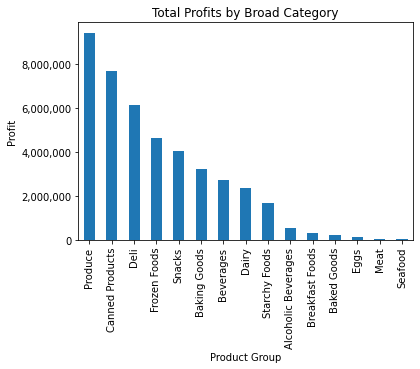

In [242]:
#broad category profitablity plot
df.groupby('Product Group')['Margin'].sum().sort_values(ascending=False).\
plot(kind='bar',
     title='Total Profits by Broad Category',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [ ]:
#the above shows us the overall profitability of each category factoring in all profits and losses
#and shows us that across all categories no overall losses have been incurred

Top 10 profitable:

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/389258227.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000'),
 Text(0, 8000000.0, '8,000,000')]

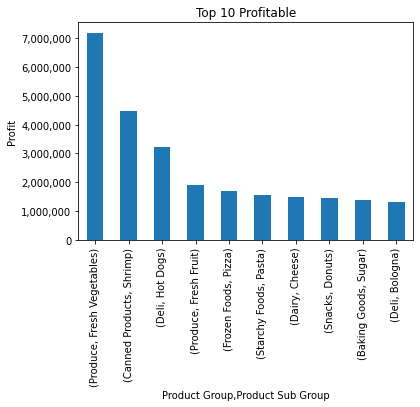

In [253]:
df.groupby(['Product Group','Product Sub Group'])['Margin'].sum().sort_values(ascending=False).head(10).\
plot(kind='bar',
     title='Top 10 Profitable',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [ ]:
#Observing the above, the top 3 standout profit performers to be:
#1. Fresh Vegetables
#2. Canned Shrimp
#3. Deli Hot Dogs

Least profitable investigation:

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/1512445200.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000.0, '2,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 8000.0, '8,000'),
 Text(0, 10000.0, '10,000'),
 Text(0, 12000.0, '12,000'),
 Text(0, 14000.0, '14,000'),
 Text(0, 16000.0, '16,000'),
 Text(0, 18000.0, '18,000')]

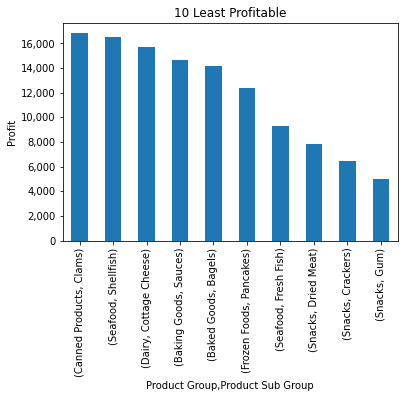

In [254]:
df.groupby(['Product Group','Product Sub Group'])['Margin'].sum().sort_values(ascending=False).tail(10).\
plot(kind='bar',
     title='10 Least Profitable',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [ ]:
#Observing the above, even in the least profitable sub-categories
#no overall loss is incurred
#with the minimum profits being seen with Gum at around 5,000

#### Sales Rep Investigation:

Most profitable sales reps

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/1730500273.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

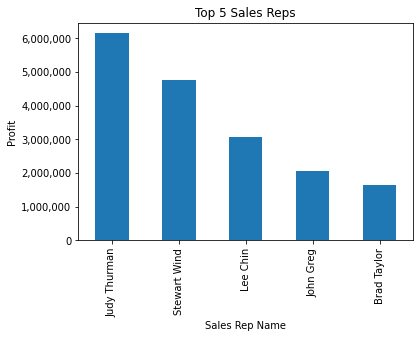

In [321]:
df.groupby('Sales Rep Name')['Margin'].sum().sort_values(ascending=False).head(5).\
plot(kind='bar',
     title='Top 5 Sales Reps',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [307]:
#From the above observe that the top 3 Sales Rep performance is a significant step above their counterparts
#Lets see what they sell by using this function
def reps_top_10_sold(name):
    df[df['Sales Rep Name'] == name].value_counts('Product Sub Group').head(10).plot(kind='bar',
                                                                                     title=name+"'s Most Sold",
                                                                                     ylabel='Sales Qty')

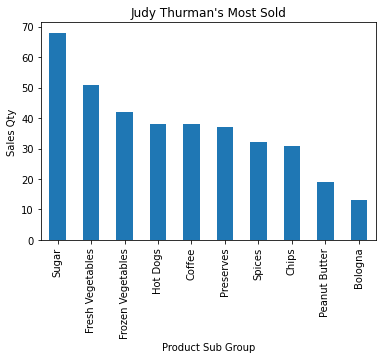

In [310]:
reps_top_10_sold('Judy Thurman')
#Judy is selling high volumes of profitable categories

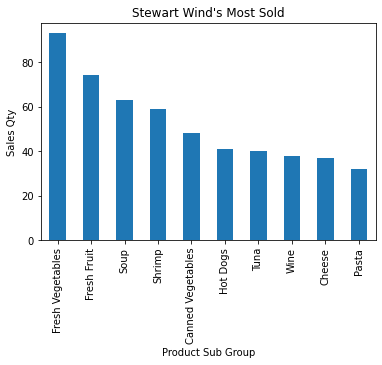

In [305]:
reps_top_10_sold('Stewart Wind')
#Stewart is selling very high volumes of profitable categories

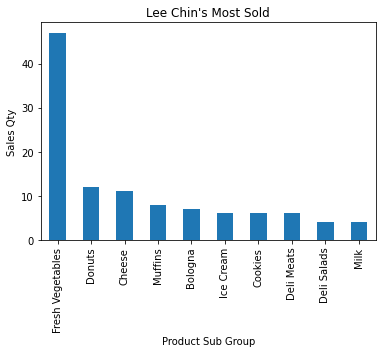

In [306]:
reps_top_10_sold('Lee Chin')
#Lee is selling a high volume of the most profitable category and a disproportionate low volume of other categories

In [ ]:
#as expected the 3 most profitable sales reps all have in common high volumes of Fresh Vegetable sales

Least profitable sales reps

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/3709436293.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 10000.0, '10,000'),
 Text(0, 20000.0, '20,000'),
 Text(0, 30000.0, '30,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 50000.0, '50,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 70000.0, '70,000')]

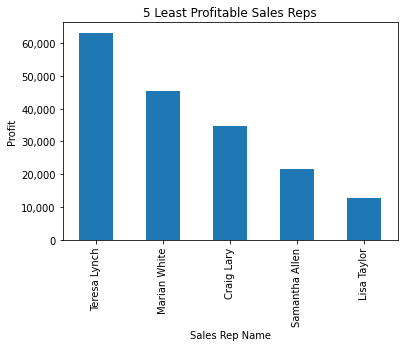

In [320]:
df.groupby('Sales Rep Name')['Margin'].sum().sort_values(ascending=False).tail(5).\
plot(kind='bar',
     title='5 Least Profitable Sales Reps',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [307]:
#The sales rep generating the least profits is is generating about 12000
#Lets analyse what the bottom 3 sales reps tend to sell the most of
def reps_top_10_sold(name):
    df[df['Sales Rep Name'] == name].value_counts('Product Sub Group').head(10).plot(kind='bar',
                                                                                     title=name+"'s Most Sold",
                                                                                     ylabel='Sales Qty')

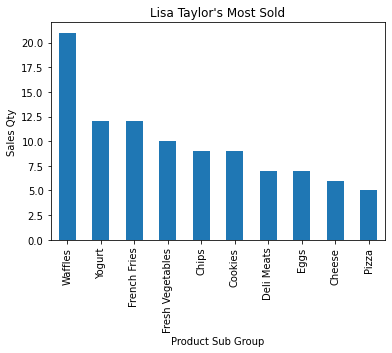

In [316]:
reps_top_10_sold('Lisa Taylor')
#Lisa is selling medium to low overall volumes, but mainly of products of low profitability items

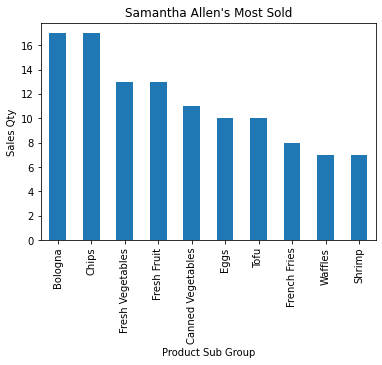

In [317]:
reps_top_10_sold('Samantha Allen')
#Samantha is selling medium to low overall volumes, and mainly of products of low profitability items

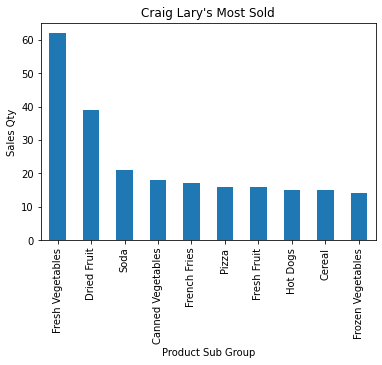

In [318]:
reps_top_10_sold('Craig Lary')
#Craig is a high volume of the most profitable category and medium volumes of low profitability items

#### Volume vs Profitability relationship

<AxesSubplot:title={'center':'Sales Volumes vs Profitability Relationship'}, xlabel='Margin', ylabel='Sales Qty'>

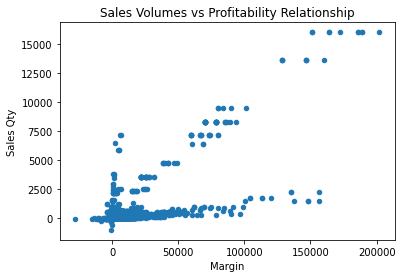

In [337]:
df.plot(kind='scatter',x='Margin',y='Sales Qty',
     title='Sales Volumes vs Profitability Relationship')

We can ascertain from the above that there is a positive correlation between item sales volume and profitability
this plot illustrates that the higher sales volume items are also the highest profitability items

This plot also provides insights that 2 other volume/profitability vectors exist:
1. Near vertical vector of low-medium volume items (2500-7500 qty) with around break-even profitability
2. Near horizontal vector of lower volume items (0-2500 qty), which are densely delivering low profitability at low-volumes, and exponentially profitability along the vector as the volume slightly increases

In [ ]:
#look into the products at the 0-2500 qty / 50,000-120,000 sweet spot range

#### Customer patterns

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/874463245.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000')]

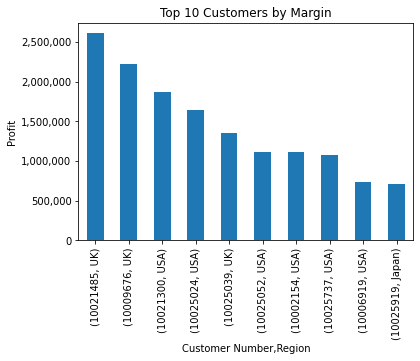

In [347]:
df.groupby(['Customer Number','Region'])['Margin'].sum().sort_values(ascending=False).head(10).\
plot(kind='bar',
     title='Top 10 Customers by Margin',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

From the above we can ascertain:
- the highest profits are from 2 UK customers
- the second highest profits are from 5 USA customers

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/3488971480.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 7500000.0, '7,500,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12500000.0, '12,500,000'),
 Text(0, 15000000.0, '15,000,000'),
 Text(0, 17500000.0, '17,500,000'),
 Text(0, 20000000.0, '20,000,000')]

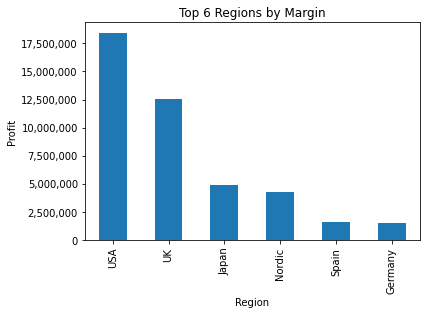

In [350]:
df.groupby('Region')['Margin'].sum().sort_values(ascending=False).head(6).\
plot(kind='bar',
     title='Top 6 Regions by Margin',
     ylabel='Profit')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

From the above we ascertain:
- There may be opportunities to increase the profitability in UK, Japan, Nordic, Spain, Germany

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/2154098518.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000')]

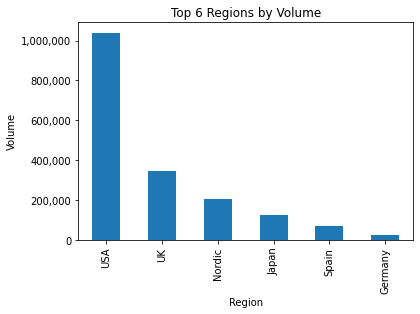

In [352]:
df.groupby('Region')['Sales Qty'].sum().sort_values(ascending=False).head(6).\
plot(kind='bar',
     title='Top 6 Regions by Volume',
     ylabel='Volume')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

- USA has the highest sales volumes, and also the highest profitability, so it would be the significant contributor to the positive volume/profitability correlation we saw in the scatter plot
- UK is a highly profitable region but has relatively low sales volume. An opportunity for the business which may overtake USA profitability if the current profit/volume ratio remains true

/var/folders/gj/qpz9jvmd3dj2sjqlpbhnx5b80000gn/T/ipykernel_12596/3691673269.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500.0, '500'),
 Text(0, 1000.0, '1,000'),
 Text(0, 1500.0, '1,500'),
 Text(0, 2000.0, '2,000'),
 Text(0, 2500.0, '2,500'),
 Text(0, 3000.0, '3,000')]

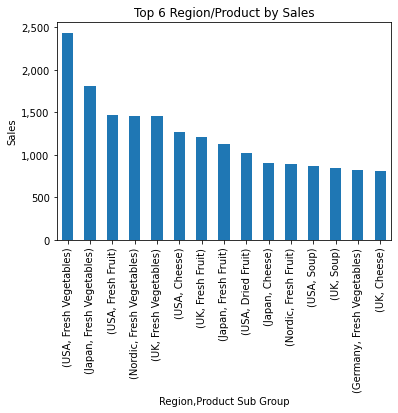

In [364]:
df.groupby('Region')['Product Sub Group'].value_counts().sort_values(ascending=False).head(15).\
plot(kind='bar',
     title='Top 6 Region/Product by Sales',
     ylabel='Sales')
#after plotting the data, store the y-axis ticks
current_values = plt.gca().get_yticks()
#looping through y-axis ticks with format string '{:.0f}' to remove scientific notation
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

- Surprisingly Japan sees the second highest sales of Fresh Vegetables which are the most profitable category, however Japan is only the 3rd most profitabe region.

#### Cost vs Margin relationship

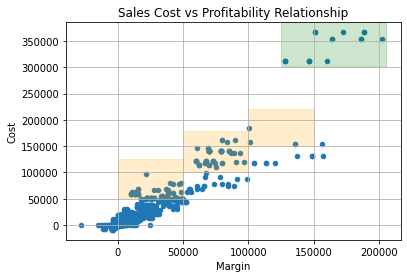

In [480]:
df[["Cost","Margin"]].sort_values(by='Margin').\
plot(kind='scatter',
     x='Margin',y='Cost',
     title='Sales Cost vs Profitability Relationship')
plt.grid()

#cluster 1 - orange
plt.axvspan(0, 50000, ymin = 0.19, ymax = 0.37, color='orange', alpha=0.2)
plt.axvspan(50000, 100000, ymin = 0.31, ymax = 0.5, color='orange', alpha=0.2)
plt.axvspan(100000, 150000, ymin = 0.43, ymax = 0.6, color='orange', alpha=0.2)

#cluster 2 - green
plt.axvspan(125000, 205000, ymin = 0.8, ymax = 1, color='green', alpha=0.2)

From the above we ascertain 2 key insights

Cluster Orange - Medium cost-Medium profitability:
- Medium cost items delivering medium profitability with low cocentration of datapoints
- Recommends looking for ways to increase the volume/datapoints of these items

Cluster Green - High cost-High profitability:
- High cost items delivering very high profit margins even with a low concentration of datapoints
- Recommends looking at increasing marketing to increase sales volume of these items

    What is causing the green cluster?

In [478]:
#item type causing green cluster
df[df['Cost'] > 300000].value_counts('Item Desc')

Item Desc
High Top Dried Mushrooms    17
dtype: int64

# *Top 3 Actionable Insights:*

1. Investigate strategies to increase sales volumes of the highly profitable 'High Top Dried Mushrooms'

2. Investigate strategies to increase sales volume in the UK region as the UK is a highly profitable region but has relatively low sales volume. This could be an opportunity for the business which may overtake USA in the position of profitability if the current profit/volume ratio of the UK remains true

3. Investigate strategies to increase sales volume of products in the sweet spot at 0-2500 qty and 50,000-120,000 margin as the datapoints in this area are already very high performers in terms of delivering profit per qty